# Importing essential libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring the dataset

In [ ]:
# Reading the dataset
data = pd.read_csv('heart.csv')

In [ ]:
# Let's look at the first five rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# And the last five rows of the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Check if the dataset has any missing  values
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Generating the number of rows and columns of the dataset
data.shape

(303, 14)

In [ ]:
# Generating the general statistics of the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

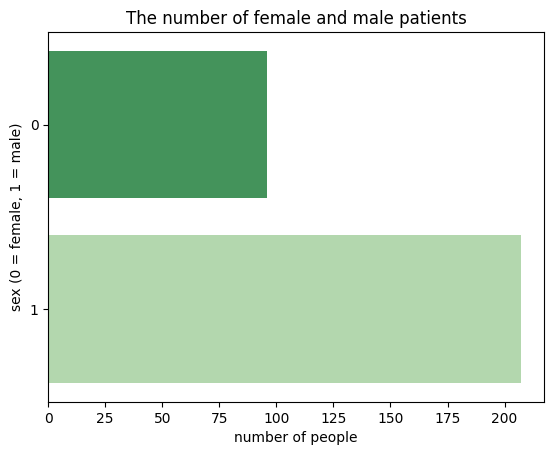

In [ ]:
# First, look at the number of male and female patients
sns.countplot(y='sex', data=data, palette='Greens_r')
plt.xlabel('number of people')
plt.ylabel('sex (0 = female, 1 = male)')
plt.title("The number of female and male patients")
plt.show()


In [ ]:
count_female = len(data[data.sex == 0])
count_male = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((count_female / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((count_male / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [ ]:
# Next, we can look at the number of people who have heart disease and who dont
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

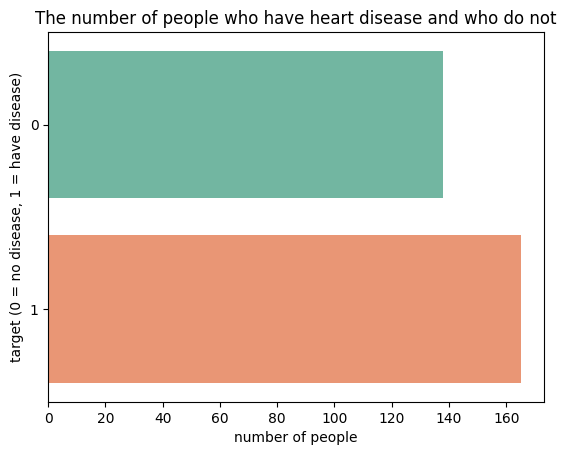

In [ ]:
# Visualizing this with horizontal countplot
sns.countplot(y='target', data=data, palette='Set2')
plt.xlabel('number of people')
plt.ylabel('target (0 = no disease, 1 = have disease)')
plt.title("The number of people who have heart disease and who do not")
plt.show()


In [ ]:
count_no = len(data[data.target == 0])
count_have = len(data[data.target == 1])
print("Percentage of patients who do not have heart disease: {:.2f}%".format((count_no / (len(data.target))*100)))
print("Percentage of patients who have heart diease: {:.2f}%".format((count_have / (len(data.target))*100)))

Percentage of patients who do not have heart disease: 45.54%
Percentage of patients who have heart diease: 54.46%


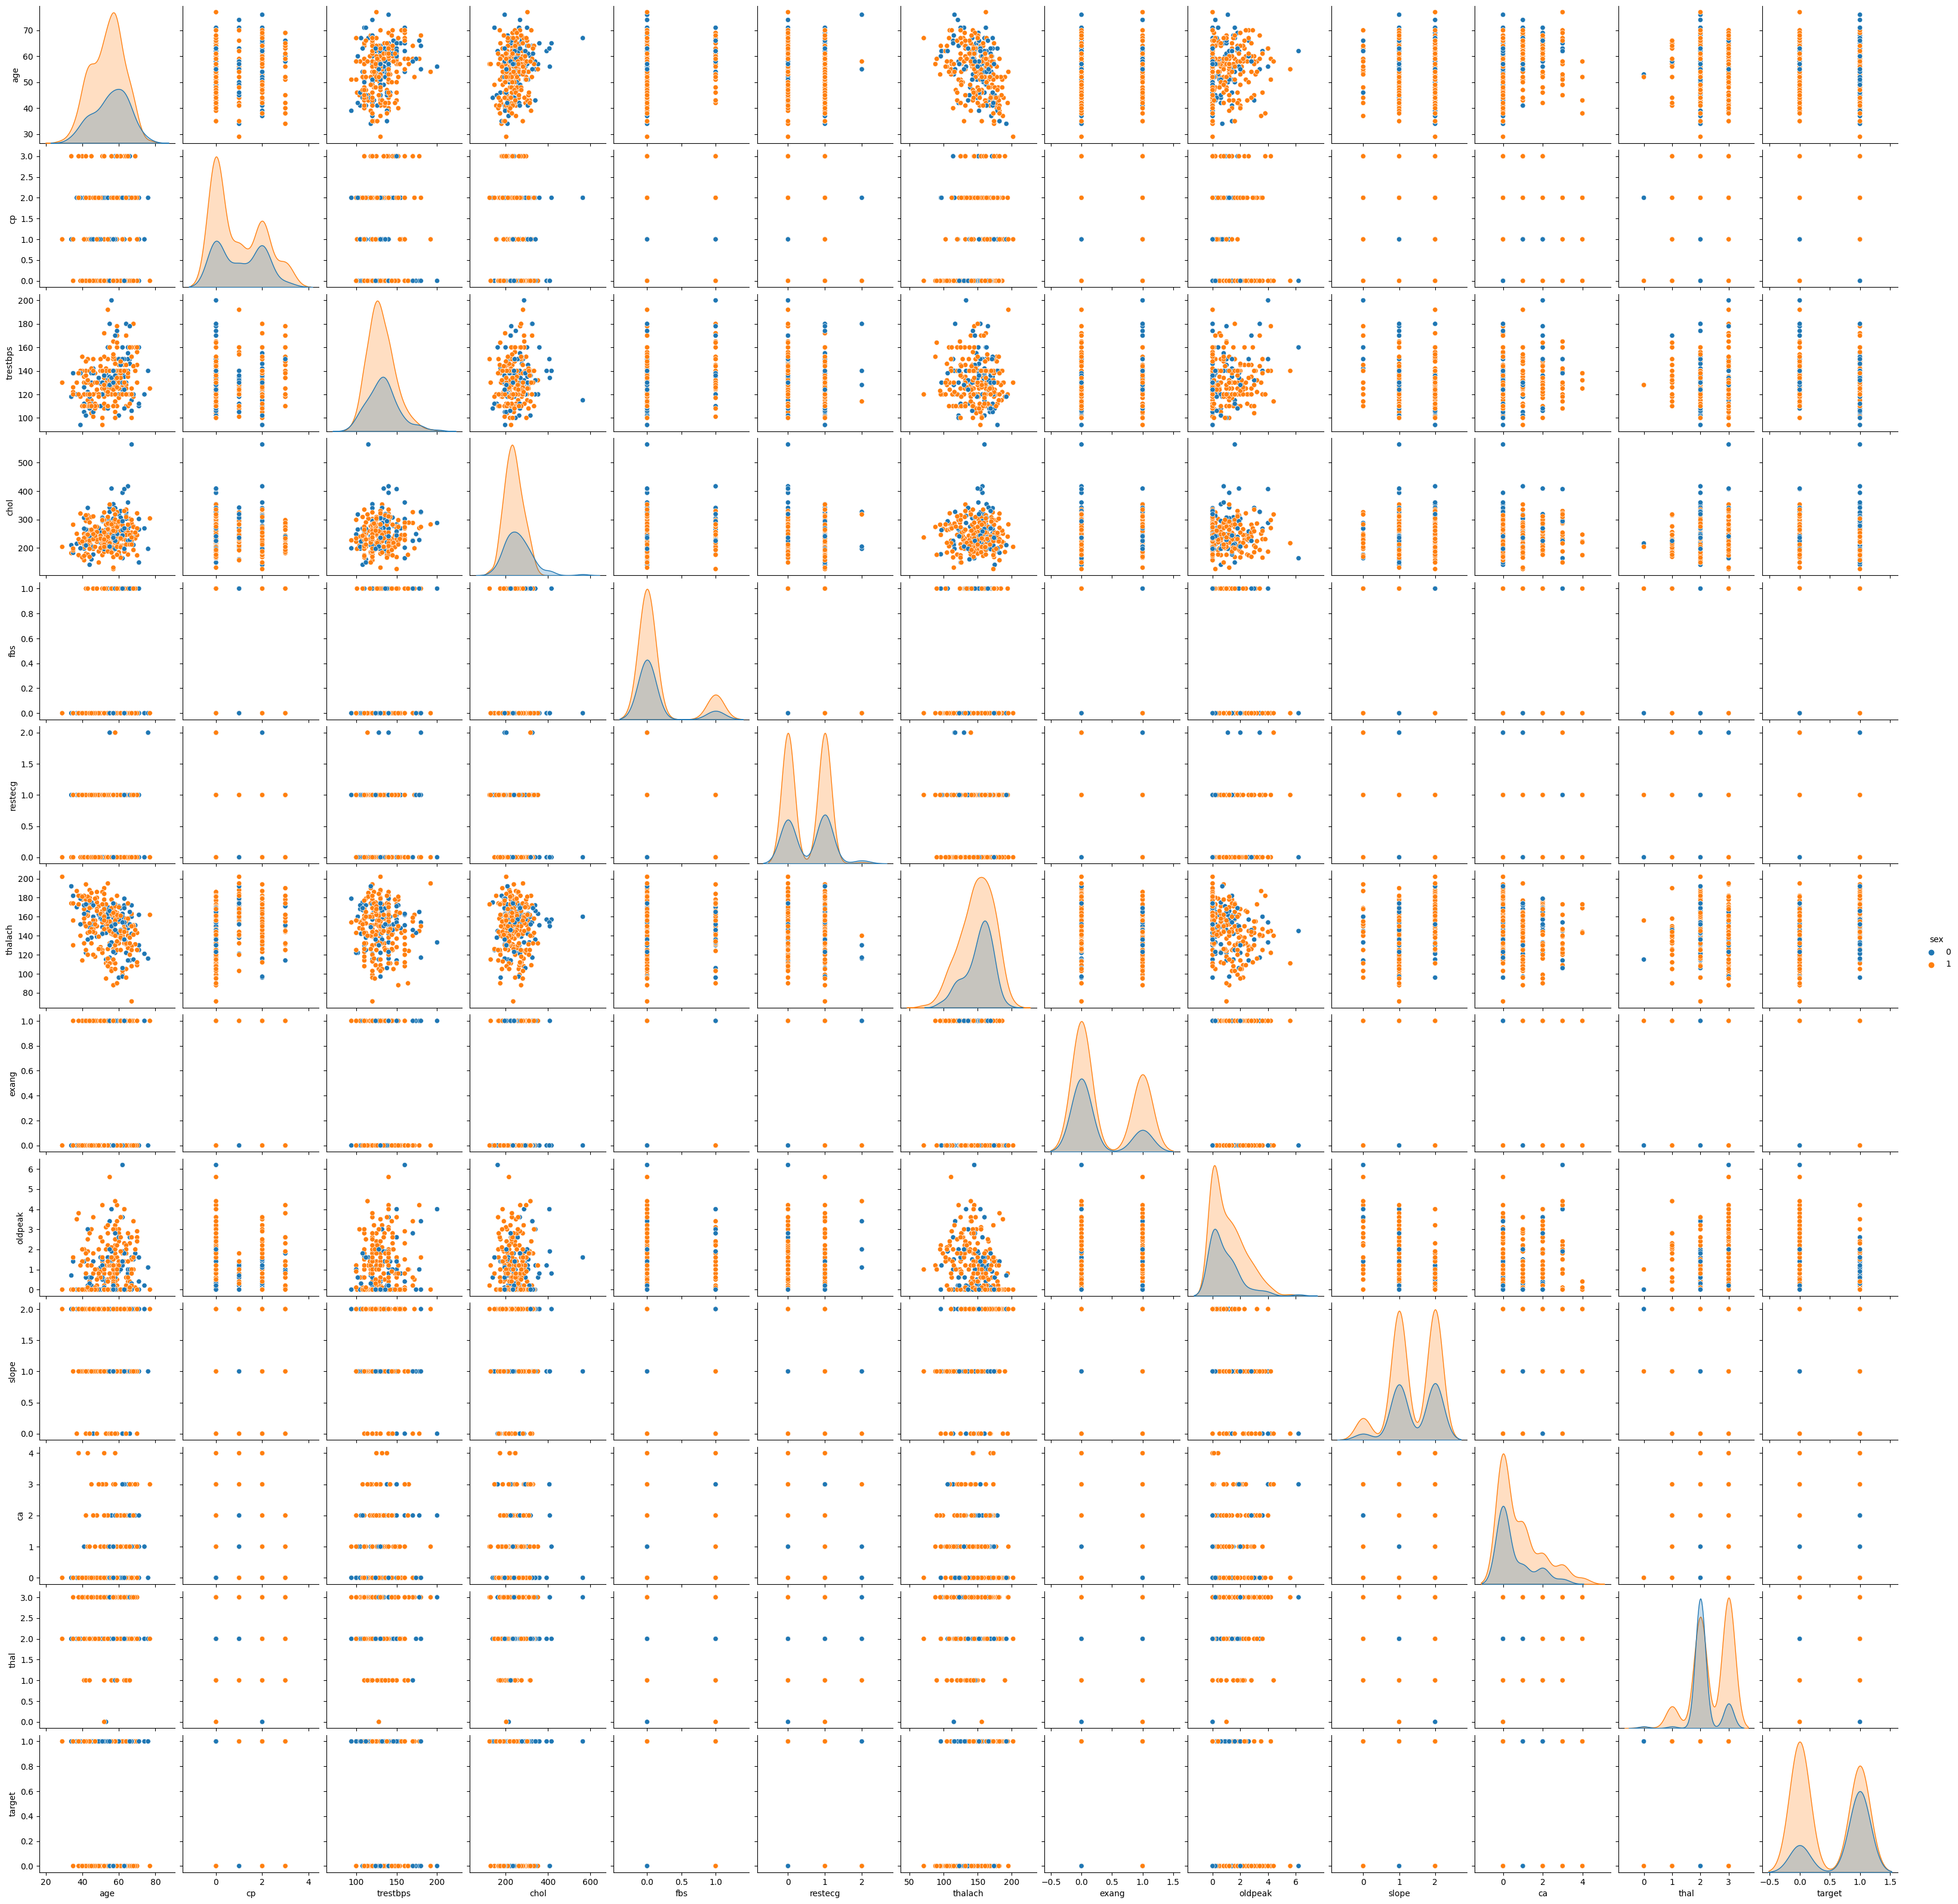

In [ ]:
# Generating the pair plot for the entire dataset
sns.pairplot(data, hue='sex')
plt.show()

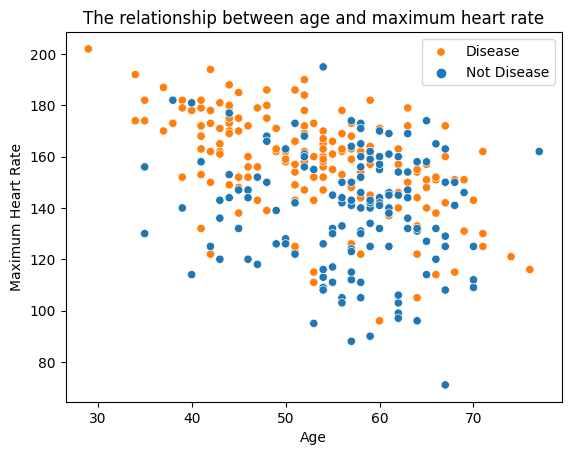

In [ ]:
# Scatter plot showing the relationship between age and maximum heart rate
sns.scatterplot(x='age', y='thalach', data=data, hue='target')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title("The relationship between age and maximum heart rate")
plt.show()

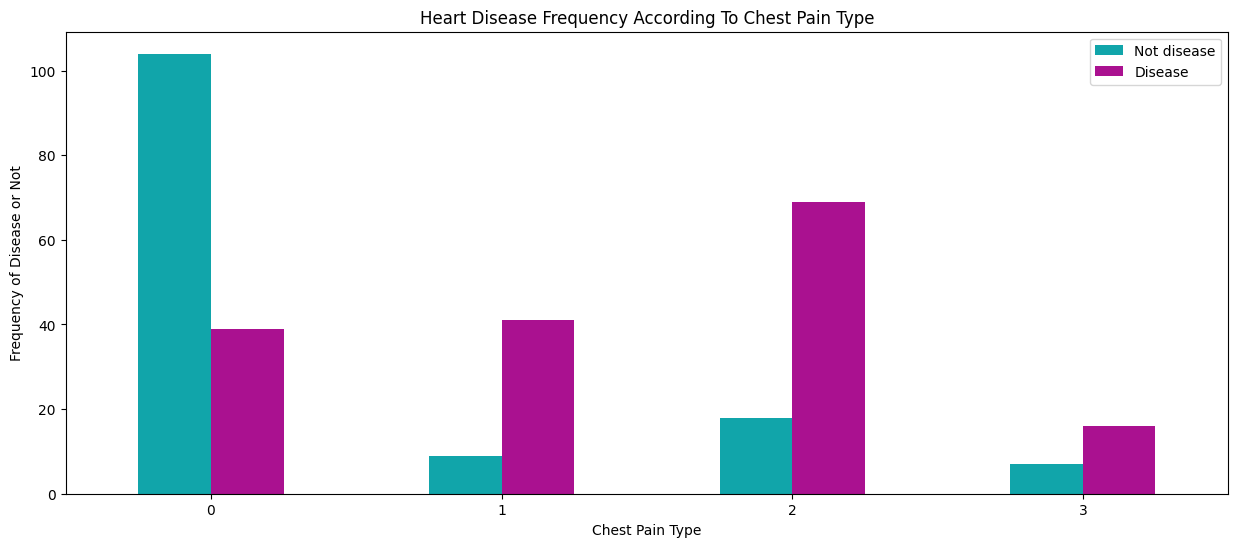

In [ ]:
# Heart disease frequency based on different chest pain type
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.legend(["Not disease", "Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

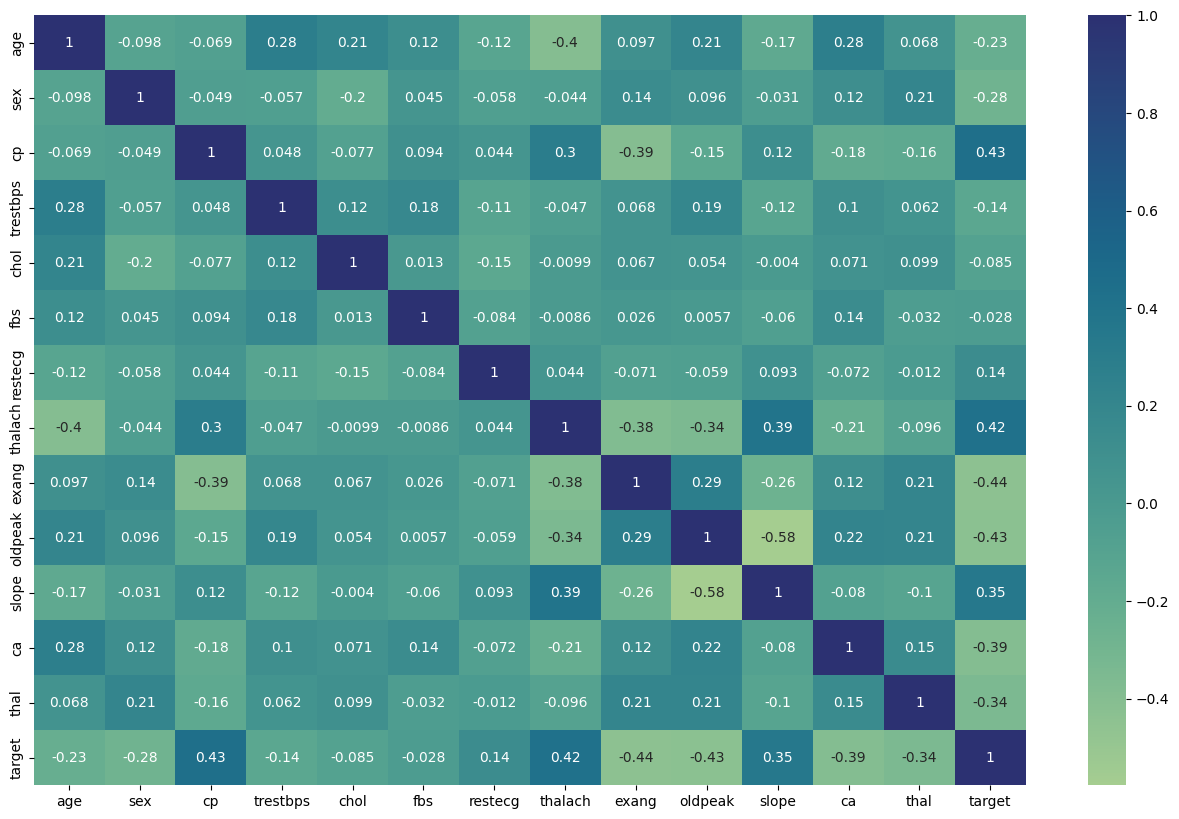

In [ ]:
# Plotting the heatmap of the dataset
plt.figure(figsize=(16,10))
heatmap_plot = sns.heatmap(data.corr(), cmap="crest", annot=True)
plt.show()

# Data pre-processing

The first step we need to do is to create dummy variables for column 'cp', 'thal', and 'slope' since they are categorical variables. The aim of this step is to prevent misinterpretation. If categorical variables are not converted into dummy variables, some machine learning algorithms may treat them as ordinal variables, assigning an order to the categories that doesn't actually exist. This can lead to incorrect model interpretations and predictions.

In [ ]:
cp_dum = pd.get_dummies(data['cp'], prefix ="cp", dtype=int)
thal_dum = pd.get_dummies(data['thal'], prefix = "thal", dtype=int)
slope_dum = pd.get_dummies(data['slope'], prefix = "slope", dtype=int)

In [ ]:
new_data = pd.concat([data, cp_dum, thal_dum, slope_dum], axis = 1)
new_data = new_data.drop(columns = ['cp', 'thal', 'slope'])
new_data.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# new_data = new_data.drop(columns = ['cp', 'thal', 'slope'])
# new_data.head()

# Model preparation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [ ]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

Now we need to check whether the data is equally splitted or not.

In [ ]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 133, 0: 109})

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Develop a function to generate the accuracy score, confusion matrix, and classification report

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, X, y):
    """
    Evaluate a machine learning model and report accuracy, confusion matrix, and classification report.

    Parameters:
    - model: The trained machine learning model.
    - X: Feature data for evaluation.
    - y: True target labels for evaluation.
    """
    # Predict the classes
    y_pred = model.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)

    # Generate and plot confusion matrix with seaborn
    confusion_mat = confusion_matrix(y, y_pred)
    sns.heatmap(confusion_mat, annot=True)
    plt.xlabel('Predicted classes')
    plt.ylabel('Actual classes')
    plt.show()

    # Create a classification report
    class_report = classification_report(y, y_pred)

    # Print the evaluation results
    print("Accuracy:", accuracy)
    print("")
    print("Classification Report:\n", class_report)

# Logistic Regression Algorithm

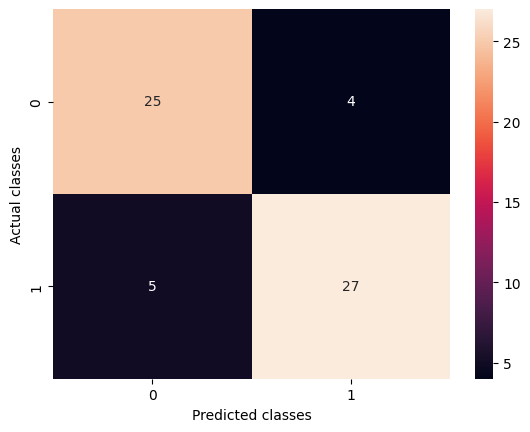

Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test)

Use Grid Search to tune hyperparameters

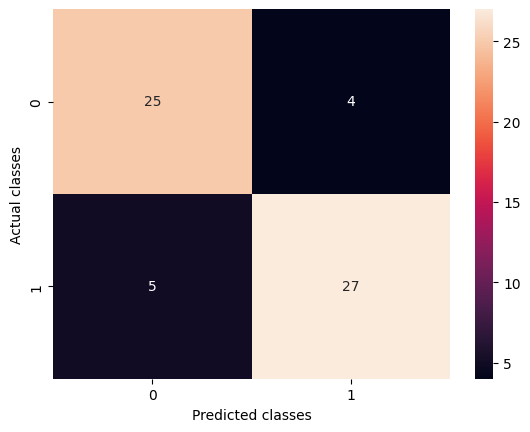

Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear'],  # For small datasets, 'liblinear' is a good choice
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator (model)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
evaluate_model(best_model, X_test, y_test)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# K-Nearest Neighbour (KNN) classification

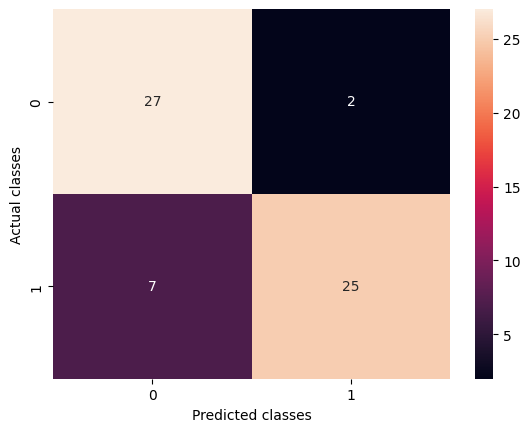

Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

Use Grid Search to tune hyperparameters

The best KNN model with k=21 has an accuracy of 0.8852459016393442


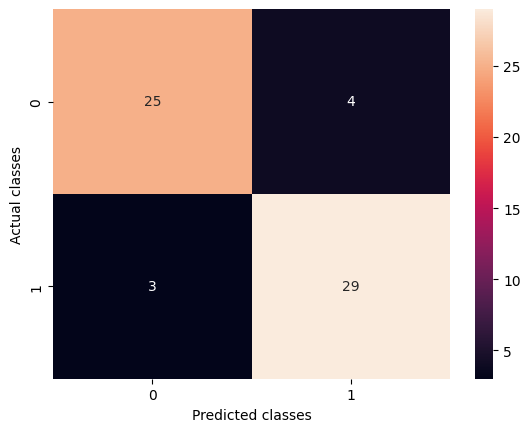

Accuracy: 0.8852459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Define a range of 'k' values to test
neighbors = list(range(1, 50, 2))
param_grid = {'n_neighbors': neighbors} #number of neighbors

# Create the KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best 'k' value
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best 'k' value
best_k = grid_search.best_params_['n_neighbors']

# Train the KNN model with the best 'k' on the entire training dataset
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the best KNN model on the test dataset
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The best KNN model with k={best_k} has an accuracy of {accuracy}")
evaluate_model(best_knn, X_test, y_test)

# Random Forest Classification

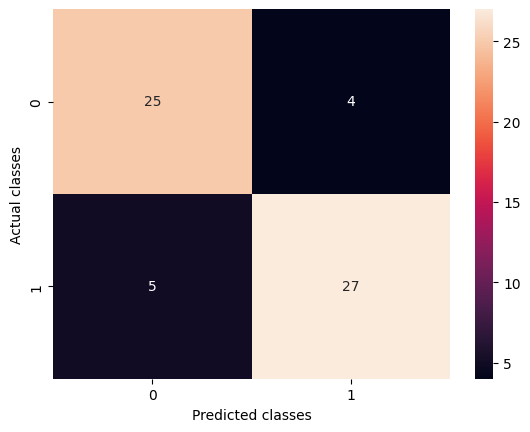

Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

Use Grid Search to tune hyperparameters

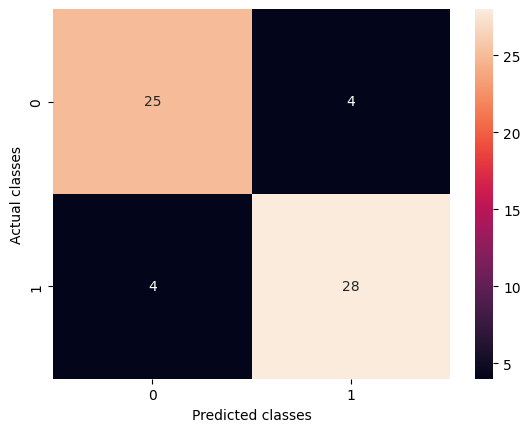

Accuracy: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Best Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 25}


In [ ]:
# Define a grid of hyperparameters to search for
param_grid = {
    'n_estimators': [25, 50, 100, 150], # number of trees in the forest
    'max_features': ['sqrt', 'log2', None], # max number of features considered for splitting a node
    'max_depth': [3, 6, 9], # max number of levels in each decision tree
    'max_leaf_nodes': [3, 6, 9], # grow tree with maximum leaf nodels
}

rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)
# Get the best hyperparameters and the best estimator (model)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
evaluate_model(best_model, X_test, y_test)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Compare the accuracy of tuned models

In [ ]:
scores = [85.24, 88.52, 86.89]
algorithms = ['Logistic Regression', 'K-nearest Neighbor', 'Random Forest']
for i in range(len(algorithms)):
  print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The accuracy score achieved using Logistic Regression is: 85.24%
The accuracy score achieved using K-nearest Neighbor is: 88.52%
The accuracy score achieved using Random Forest is: 86.89%


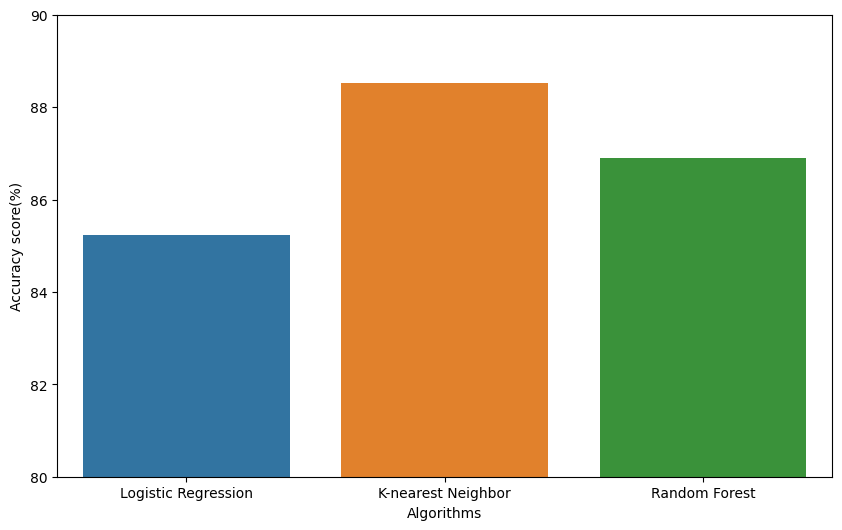

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score(%)')
plt.ylim([80,90])
plt.show()